In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('./data/mmALL_073119_csv.csv')
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...


In [3]:
df.shape

(16363, 31)

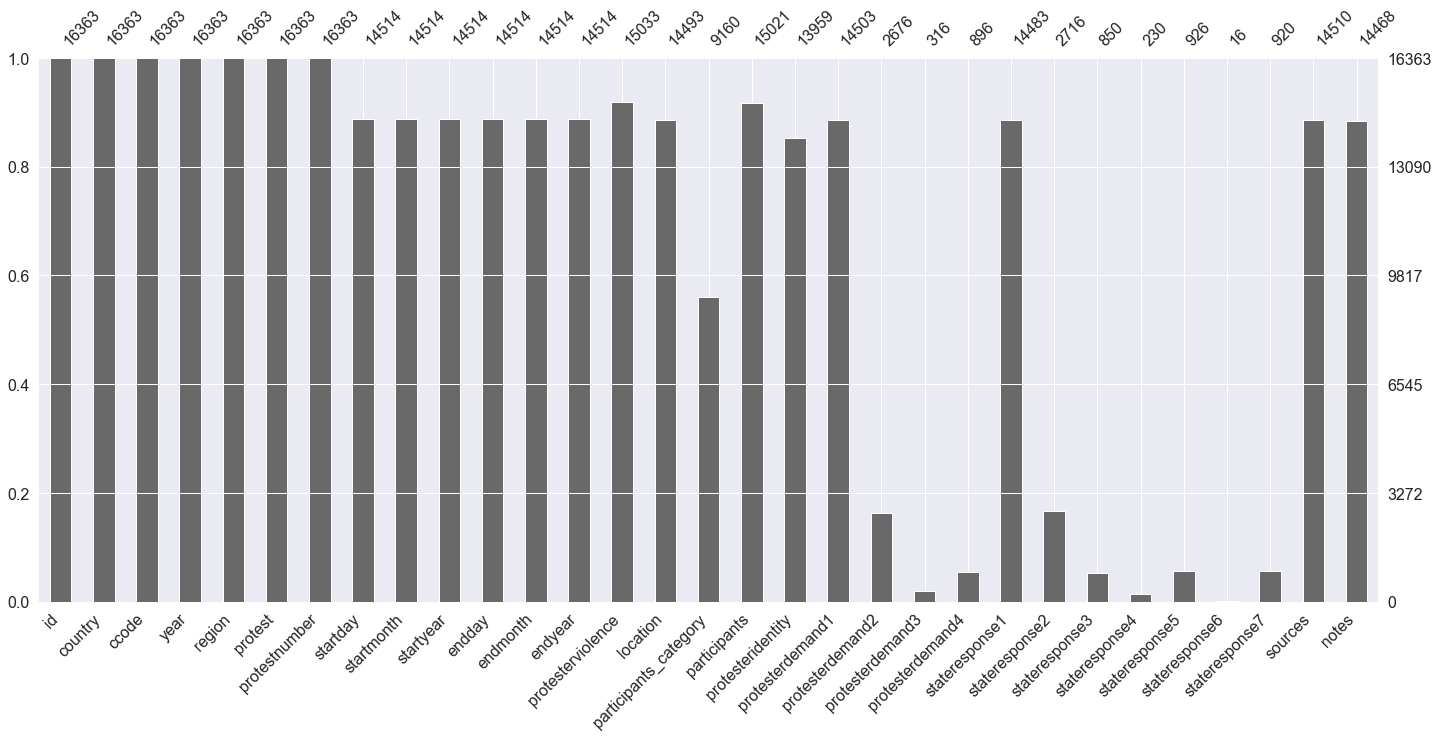

In [4]:
sns.set()
msno.bar(df);

In [5]:
df.isnull().sum()

id                           0
country                      0
ccode                        0
year                         0
region                       0
protest                      0
protestnumber                0
startday                  1849
startmonth                1849
startyear                 1849
endday                    1849
endmonth                  1849
endyear                   1849
protesterviolence         1330
location                  1870
participants_category     7203
participants              1342
protesteridentity         2404
protesterdemand1          1860
protesterdemand2         13687
protesterdemand3         16047
protesterdemand4         15467
stateresponse1            1880
stateresponse2           13647
stateresponse3           15513
stateresponse4           16133
stateresponse5           15437
stateresponse6           16347
stateresponse7           15443
sources                   1853
notes                     1895
dtype: int64

In [6]:
df.dtypes

id                         int64
country                   object
ccode                      int64
year                       int64
region                    object
protest                    int64
protestnumber              int64
startday                 float64
startmonth               float64
startyear                float64
endday                   float64
endmonth                 float64
endyear                  float64
protesterviolence        float64
location                  object
participants_category     object
participants              object
protesteridentity         object
protesterdemand1          object
protesterdemand2          object
protesterdemand3          object
protesterdemand4          object
stateresponse1            object
stateresponse2            object
stateresponse3            object
stateresponse4            object
stateresponse5            object
stateresponse6            object
stateresponse7            object
sources                   object
notes     

In [7]:
df['startday'] = df['startday'].fillna(999)
df['startmonth'] = df['startmonth'].fillna(999)
df['startyear'] = df['startyear'].fillna(999)
df['endday'] = df['endday'].fillna(999)
df['endmonth'] = df['endmonth'].fillna(999)
df['endyear'] = df['endyear'].fillna(999)

In [8]:
df_half = df[['id', 'country', 'protesterviolence', 'location', 'participants_category', 'participants', 'protesteridentity']]
df_half.head()

,id,country,protesterviolence,location,participants_category,participants,protesteridentity
0,201990001,Canada,0.0,national,NaN,1000s,unspecified
1,201990002,Canada,0.0,"Montreal, Quebec",NaN,1000,unspecified
2,201990003,Canada,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois
3,201990004,Canada,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians
4,201990005,Canada,1.0,"Montreal, Quebec",NaN,950,local residents


In [9]:
df['protesterviolence'].fillna(0, inplace=True)

In [10]:
df['protesterdemand1'].value_counts()

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [11]:
df['stateresponse1'].value_counts()

ignore             7934
crowd dispersal    3612
arrests            1049
accomodation        937
shootings           415
beatings            300
killings            236
Name: stateresponse1, dtype: int64

In [12]:
df['protesterdemand1'].fillna('999', inplace=True)
df['protesterdemand2'].fillna('999', inplace=True)
df['protesterdemand3'].fillna('999', inplace=True)
df['protesterdemand4'].fillna('999', inplace=True)
df['stateresponse1'].fillna('999', inplace=True)
df['stateresponse2'].fillna('999', inplace=True)
df['stateresponse3'].fillna('999', inplace=True)
df['stateresponse4'].fillna('999', inplace=True)

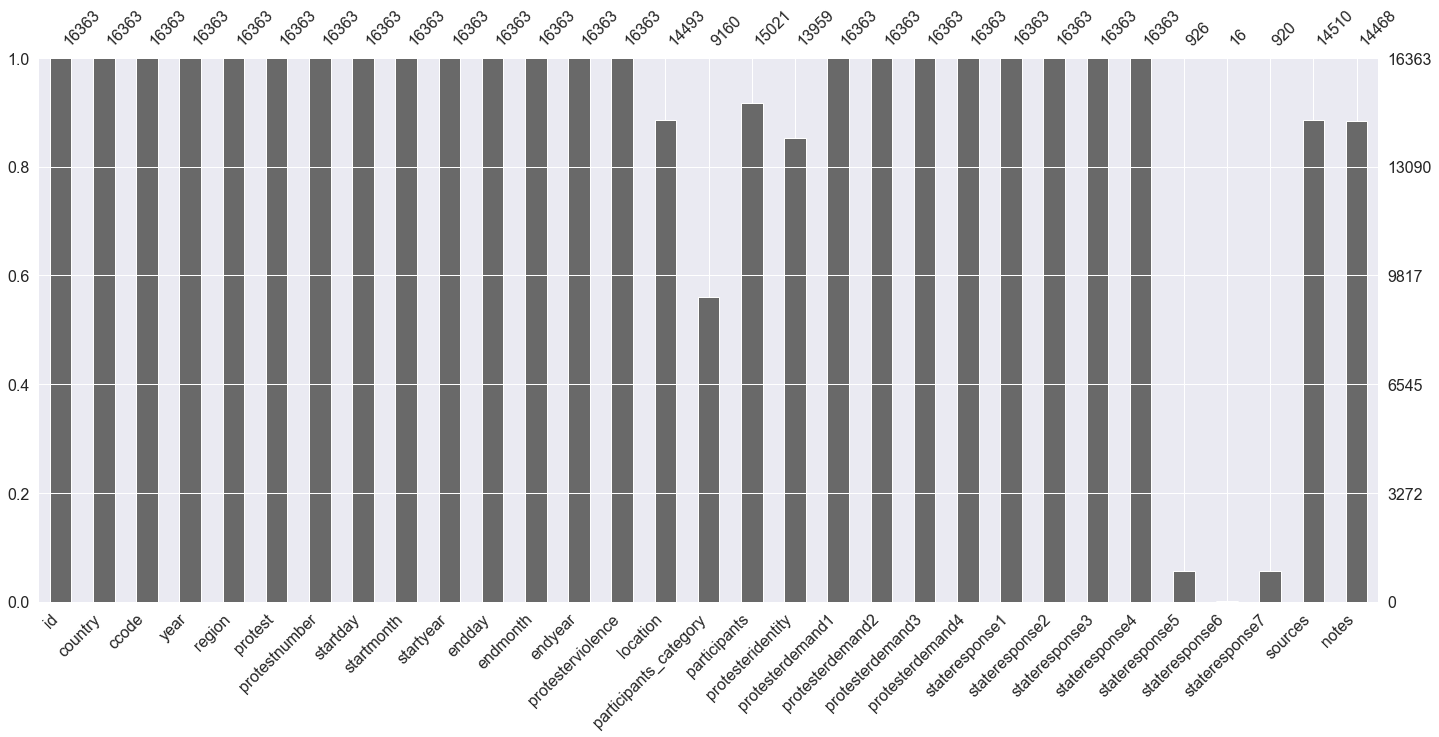

In [13]:
msno.bar(df);

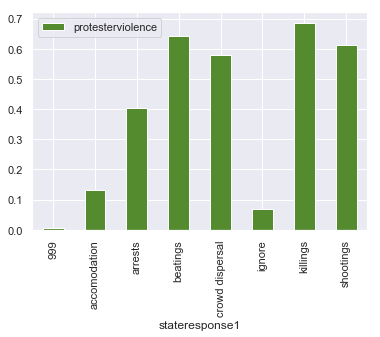

In [14]:
df.groupby(['stateresponse1']).mean()[['protesterviolence']].plot(kind='bar', color='#558b2f')

In [ ]:
# https://civicus.org/protest-resilience-toolkit/strategies/

In [ ]:
# Thinking stateresponse numbers for classification
# Chose not to use dummies in this case
stateresponse_codes = {'accomodation':1,'ignore':2,'arrests':3,'crowd dispersal':4,
                       'shootings':5,'beatings':6,'killings':7}
protesterdemand_codes = {'political behavior, process':1,
                         'labor wage dispute':2,
                         'price increases, tax policy':3,
                         'removal of politician':4,
                         'police brutality':5,'land farm issue':6,
                         'social restrictions':7}
for col in df.columns:
    if 'demand' in col:
        df[col] = df[col].map(protesterdemand_codes)
for col in df.columns:
    if 'response' in col:
        df[col] = df[col].map(stateresponse_codes)

In [ ]:
# some engineering for protest length by total days
df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']
df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [ ]:
sns.pairplot(df, y_vars=['SalePrice'] , x_vars=['Year Remod/Add', 'Year Built', 'Gr Liv Area'], height = 4.5);

## Cleaning 2.0

In [85]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [48]:
df = pd.read_csv('./data/mmALL_073119_csv.csv')
df.head(2)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...


In [49]:
df.shape

(16363, 31)

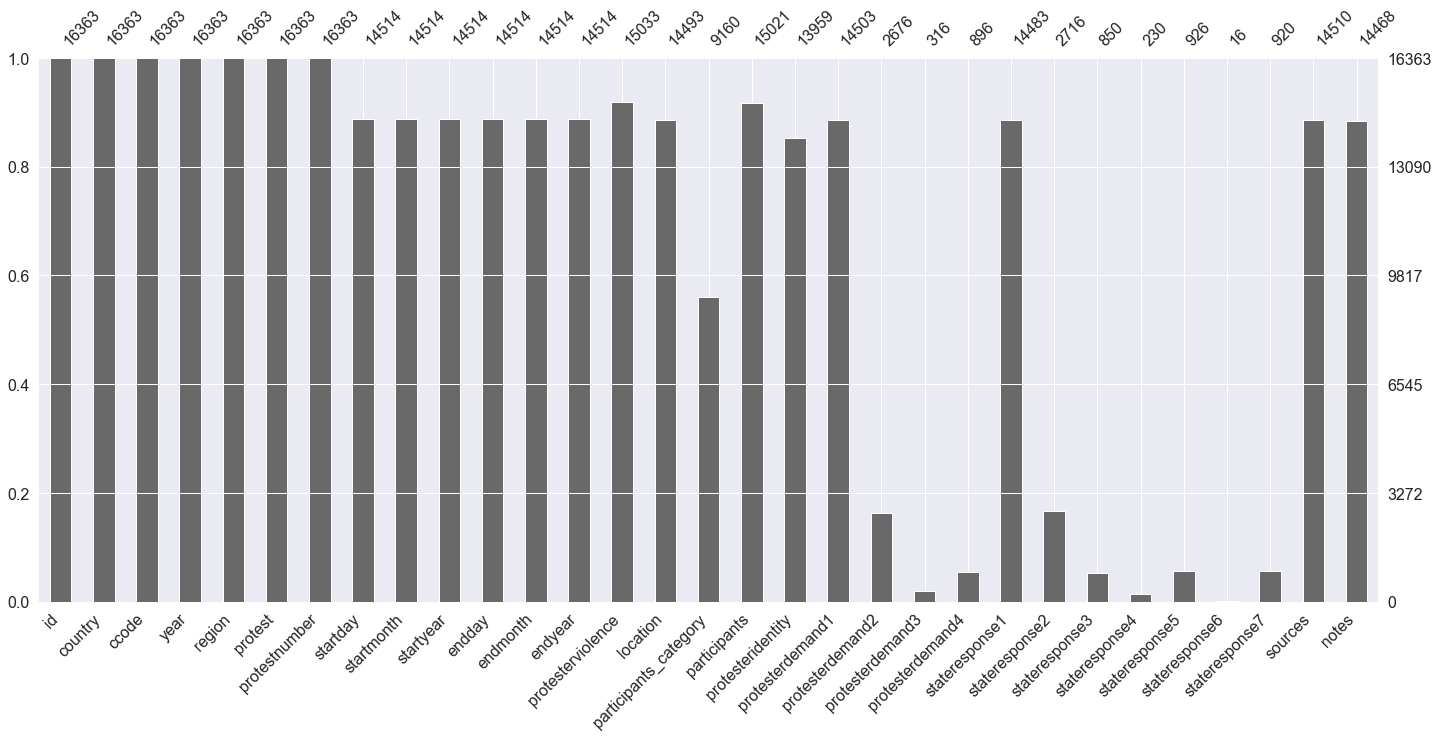

In [50]:
sns.set()
msno.bar(df);

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 31 columns):
id                       16363 non-null int64
country                  16363 non-null object
ccode                    16363 non-null int64
year                     16363 non-null int64
region                   16363 non-null object
protest                  16363 non-null int64
protestnumber            16363 non-null int64
startday                 14514 non-null float64
startmonth               14514 non-null float64
startyear                14514 non-null float64
endday                   14514 non-null float64
endmonth                 14514 non-null float64
endyear                  14514 non-null float64
protesterviolence        15033 non-null float64
location                 14493 non-null object
participants_category    9160 non-null object
participants             15021 non-null object
protesteridentity        13959 non-null object
protesterdemand1         14503 non-null obje

In [52]:
# Data engineering: length of protests
df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']
df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [53]:
categorical_columns = ['country', 'year', 'protest', 'protesterviolence',  'participants_category', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4', 'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4','stateresponse5', 'stateresponse6', 'stateresponse7']
numerical_columns = ['startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear', 'years', 'total_days']

id_columns = ['id','sources','notes', 'protesteridentity', 'location']

In [54]:
for column in categorical_columns:
    df[column].fillna('999', inplace=True)
    df[column] = df[column].map(str)
for column in numerical_columns:
    df[column].fillna(999, inplace=True)

In [55]:
protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4','stateresponse5', 'stateresponse6', 'stateresponse7']

In [56]:
df = pd.get_dummies(df, columns=protest_demands, prefix="dem", drop_first=True)
df = pd.get_dummies(df, columns=state_responses, prefix='resp')

In [57]:
df.head(2)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,"dem_price increases, tax policy",dem_removal of politician,dem_social restrictions,dem_999,dem_labor wage dispute,dem_land farm issue,dem_police brutality,"dem_political behavior, process","dem_price increases, tax policy",dem_removal of politician
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,0,0,0,1,0,0,0,0,0,0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
sa_df = df[df['region'] == 'South America'].copy()
sa_df.shape

(1653, 59)

In [59]:
sa_df = pd.get_dummies(sa_df, columns=['country', 'year', 'protest', 'protesterviolence',  'participants_category'], drop_first=True)

In [60]:
sa_df.shape

(1653, 103)

In [61]:
sa_df.columns[0:50]

Index(['id', 'ccode', 'region', 'protestnumber', 'startday', 'startmonth',
       'startyear', 'endday', 'endmonth', 'endyear', 'location',
       'participants', 'protesteridentity', 'stateresponse1', 'stateresponse2',
       'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6',
       'stateresponse7', 'sources', 'notes', 'years', 'months', 'days',
       'total_days', 'dem_labor wage dispute', 'dem_land farm issue',
       'dem_police brutality', 'dem_political behavior, process',
       'dem_price increases, tax policy', 'dem_removal of politician',
       'dem_social restrictions', 'dem_labor wage dispute',
       'dem_land farm issue', 'dem_police brutality',
       'dem_political behavior, process', 'dem_price increases, tax policy',
       'dem_removal of politician', 'dem_social restrictions',
       'dem_labor wage dispute', 'dem_land farm issue', 'dem_police brutality',
       'dem_political behavior, process', 'dem_price increases, tax policy',
       'dem

In [62]:
sa_df.columns[50:104]

Index(['dem_police brutality', 'dem_political behavior, process',
       'dem_price increases, tax policy', 'dem_removal of politician',
       'country_Bolivia', 'country_Brazil', 'country_Chile',
       'country_Colombia', 'country_Ecuador', 'country_Guyana',
       'country_Paraguay', 'country_Peru', 'country_Suriname',
       'country_Uruguay', 'country_Venezuela', 'year_1991', 'year_1992',
       'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997',
       'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'protest_1', 'protesterviolence_1.0',
       'protesterviolence_999', 'participants_category_1000-1999',
       'participants_category_2000-4999', 'participants_category_50-99',
       'participants_category_5

In [63]:
features_01 = ['protestnumber', 'total_days', 'dem_labor wage dispute', 'dem_land farm issue',
       'dem_police brutality', 'dem_political behavior, process',
       'dem_price increases, tax policy', 'dem_removal of politician',
       'dem_social restrictions', 'dem_labor wage dispute',
       'dem_land farm issue', 'dem_police brutality',
       'dem_political behavior, process', 'dem_price increases, tax policy',
       'dem_removal of politician', 'dem_social restrictions',
       'dem_labor wage dispute', 'dem_land farm issue', 'dem_police brutality',
       'dem_political behavior, process', 'dem_price increases, tax policy',
       'dem_removal of politician', 'dem_social restrictions', 'dem_999',
       'dem_labor wage dispute', 'dem_land farm issue', 'dem_police brutality', 'dem_political behavior, process',
       'dem_price increases, tax policy', 'dem_removal of politician',
       'country_Bolivia', 'country_Brazil', 'country_Chile',
       'country_Colombia', 'country_Ecuador', 'country_Guyana',
       'country_Paraguay', 'country_Peru', 'country_Suriname',
       'country_Uruguay', 'country_Venezuela', 'year_1991', 'year_1992',
       'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997',
       'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'protest_1', 'protesterviolence_1.0',
       'protesterviolence_999', 'participants_category_1000-1999',
       'participants_category_2000-4999', 'participants_category_50-99',
       'participants_category_5000-10000', 'participants_category_999',
       'participants_category_>10000']

In [64]:
X = sa_df[features_01]
y = sa_df['stateresponse1']
y.value_counts()

ignore             892
crowd dispersal    405
accomodation       123
arrests            118
999                 58
killings            39
shootings           14
beatings             4
Name: stateresponse1, dtype: int64

In [65]:
y = y.map(str)
y = y.map({'ignore': 0, 'crowd dispersal': 1, 'accomodation': 2, 'arrests': 3, 'killings': 4, 'shootings': 5, 'beatings': 6, '999': 999})
y.value_counts()

0      892
1      405
2      123
3      118
999     58
4       39
5       14
6        4
Name: stateresponse1, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Julia Christensen\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
def scoring_class(model, X1, y1, X2, y2):
    model.fit(X1, y1)
    print(f'{model} train score R2: {model.score(X1, y1)}')
    print(f'{model} test score Rs: {model.score(X2, y2)}')

In [30]:
logreg = LogisticRegression()
scoring_class(logreg, X_train_sc, y_train, X_test_sc, y_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) train score R2: 0.7102502017756255
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) test score Rs: 0.6497584541062802


In [31]:
knn = KNeighborsClassifier()
scoring_class(knn, X_train_sc, y_train, X_test_sc, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') train score R2: 0.682001614205004
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') test score Rs: 0.5676328502415459


In [32]:
svm = SVC()
scoring_class(svm, X_train_sc, y_train, X_test_sc, y_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) train score R2: 0.7215496368038741
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) test score Rs: 0.6618357487922706


In [33]:
dt = DecisionTreeClassifier()
scoring_class(dt, X_train_sc, y_train, X_test_sc, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') train score R2: 1.0
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') test score Rs: 0.533816425120773


In [34]:
bdt = BaggingClassifier()
scoring_class(bdt, X_train_sc, y_train, X_test_sc, y_test)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) train score R2: 0.9709443099273608
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) test score Rs: 0.6545893719806763


In [35]:
rf = RandomForestClassifier()
scoring_class(rf, X_train_sc, y_train, X_test_sc, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) train score R2: 0.9733656174334141
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) test score Rs: 0.6183574879227053


C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
ada = AdaBoostClassifier()
scoring_class(ada, X_train_sc, y_train, X_test_sc, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) train score R2: 0.6763518966908797
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) test score Rs: 0.642512077294686


## Grid Searching
### Logistic Regression

In [37]:
pgrid = {"C": np.linspace(0.0001, 1, 20),
        "penalty": ['l1', 'l2']}

In [38]:
logreg = LogisticRegression()
cv_folds = StratifiedKFold(shuffle=True, random_state=42)
gs = GridSearchCV(logreg, pgrid, cv=cv_folds)
gs.fit(X_train_sc, y_train)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Ch

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-04, 5.27263e-02, 1.05353e-01, 1.57979e-01, 2.10605e-01,
       2.63232e-01, 3.15858e-01, 3.68484e-01, 4.21111e-01, 4.73737e-01,
       5.26363e-01, 5.78989e-01, 6.31616e-01, 6.84242e-01, 7.36868e-01,
       7.89495e-01, 8.42121e-01, 8.94747e-01, 9.47374e-01, 1.00000e+00]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
gs.best_params_

{'C': 0.05272631578947369, 'penalty': 'l1'}

In [40]:
gs.best_score_

0.6795803066989508

In [41]:
gs.score(X_test_sc, y_test)

0.6666666666666666

### SVM

In [42]:
pgrid = {"C": np.linspace(0.0001, 1, 20)}

In [43]:
svc = SVC()
cv_folds = StratifiedKFold(shuffle=True, random_state=42)
gs = GridSearchCV(svc, pgrid, cv=cv_folds)
gs.fit(X_train_sc, y_train)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\b

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-p

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-p

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-04, 5.27263e-02, 1.05353e-01, 1.57979e-01, 2.10605e-01,
       2.63232e-01, 3.15858e-01, 3.68484e-01, 4.21111e-01, 4.73737e-01,
       5.26363e-01, 5.78989e-01, 6.31616e-01, 6.84242e-01, 7.36868e-01,
       7.89495e-01, 8.42121e-01, 8.94747e-01, 9.47374e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
gs.best_params_

{'C': 0.8947473684210527}

In [45]:
gs.best_score_

0.642453591606134

In [46]:
gs.score(X_test_sc, y_test)

0.6570048309178744

## Combine categories for y

In [66]:
X = sa_df[features_01]
y = sa_df['stateresponse1']
y.value_counts()

ignore             892
crowd dispersal    405
accomodation       123
arrests            118
999                 58
killings            39
shootings           14
beatings             4
Name: stateresponse1, dtype: int64

In [67]:
y = y.map(str)
y = y.map({'ignore': 0, 'crowd dispersal': 1, 'accomodation': 2, 'arrests': 3, 'killings': 4, 'shootings': 4, 'beatings': 4, '999': 999})
y.value_counts()

0      892
1      405
2      123
3      118
999     58
4       57
Name: stateresponse1, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Julia Christensen\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
logreg = LogisticRegression()
scoring_class(logreg, X_train_sc, y_train, X_test_sc, y_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) train score R2: 0.7110573042776432
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) test score Rs: 0.6497584541062802


In [71]:
knn = KNeighborsClassifier()
scoring_class(knn, X_train_sc, y_train, X_test_sc, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') train score R2: 0.6811945117029863
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') test score Rs: 0.5676328502415459


In [72]:
svm = SVC()
scoring_class(svm, X_train_sc, y_train, X_test_sc, y_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) train score R2: 0.7215496368038741
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) test score Rs: 0.6618357487922706


In [73]:
dt = DecisionTreeClassifier()
scoring_class(dt, X_train_sc, y_train, X_test_sc, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') train score R2: 1.0
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') test score Rs: 0.5628019323671497


In [74]:
bdt = BaggingClassifier()
scoring_class(bdt, X_train_sc, y_train, X_test_sc, y_test)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) train score R2: 0.9620661824051655
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) test score Rs: 0.6135265700483091


In [75]:
rf = RandomForestClassifier()
scoring_class(rf, X_train_sc, y_train, X_test_sc, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) train score R2: 0.9798224374495561
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) test score Rs: 0.5917874396135265


C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [76]:
ada = AdaBoostClassifier()
scoring_class(ada, X_train_sc, y_train, X_test_sc, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) train score R2: 0.5254237288135594
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) test score Rs: 0.47101449275362317


In [77]:
pgrid = {"C": np.linspace(0.0001, 1, 20)}

In [78]:
svc = SVC()
cv_folds = StratifiedKFold(shuffle=True, random_state=42)
gs = GridSearchCV(svc, pgrid, cv=cv_folds)
gs.fit(X_train_sc, y_train)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\b

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-p

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-p

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-04, 5.27263e-02, 1.05353e-01, 1.57979e-01, 2.10605e-01,
       2.63232e-01, 3.15858e-01, 3.68484e-01, 4.21111e-01, 4.73737e-01,
       5.26363e-01, 5.78989e-01, 6.31616e-01, 6.84242e-01, 7.36868e-01,
       7.89495e-01, 8.42121e-01, 8.94747e-01, 9.47374e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
gs.best_params_

{'C': 0.8947473684210527}

In [80]:
gs.best_score_

0.642453591606134

In [81]:
gs.score(X_test_sc, y_test)

0.6570048309178744

### PCA

In [86]:
pipe_knn = Pipeline([
    ('pc',PCA()),
    ('model',KNeighborsClassifier())
])
knn_params = {'pc__n_components':[10,15,20],
              'model__n_neighbors':[3,4,5,6],
             'model__p':[2,3,4]}
knn = GridSearchCV(pipe_knn,
                     knn_params,
                     cv=5,
                     verbose=1)
knn.fit(X_train_sc, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   49.7s finished
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pc', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pc__n_components': [10, 15, 20], 'model__n_neighbors': [3, 4, 5, 6], 'model__p': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [87]:
print(knn.best_params_)
print(knn.best_score_)
print(knn.score(X_test_sc, y_test))

{'model__n_neighbors': 4, 'model__p': 3, 'pc__n_components': 15}
0.6271186440677966
0.5821256038647343


In [89]:
pipe_rfc = Pipeline([
    ('pc',PCA()),
    ('model',RandomForestClassifier())
])
rfc_params = {'pc__n_components':[10,15,20],
              'model__criterion':['gini','entropy'],
              'model__max_features':['auto','sqrt','log2'],
}
# Support Vector Classifier was modelled in different Notebook due to significant runtimes.
rfc = GridSearchCV(pipe_rfc,
                     rfc_params,
                     cv=5,
                     verbose=1)
rfc.fit(X_train_sc, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaco

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Julia Christensen\anaco

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pc', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
        ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pc__n_components': [10, 15, 20], 'model__criterion': ['gini', 'entropy'], 'model__max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [90]:
print(rfc.best_params_)
print(rfc.best_score_)
print(rfc.score(X_test_sc, y_test))

{'model__criterion': 'entropy', 'model__max_features': 'sqrt', 'pc__n_components': 15}
0.6222760290556901
0.5821256038647343


In [91]:
pipe_ada = Pipeline([
    ('pc',PCA()),
    ('model',AdaBoostClassifier())
])
ada_params = {'pc__n_components':[10,15,20],
              'model__n_estimators':[40,50,60],
             'model__learning_rate':[0.5,1,1.5]}
ada = GridSearchCV(pipe_ada,
                     ada_params,
                     cv=5,
                     verbose=1)
ada.fit(X_train_sc, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   43.0s finished
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pc', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'pc__n_components': [10, 15, 20], 'model__n_estimators': [40, 50, 60], 'model__learning_rate': [0.5, 1, 1.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [92]:
print(ada.best_params_)
print(ada.best_score_)
print(ada.score(X_test_sc, y_test))

{'model__learning_rate': 0.5, 'model__n_estimators': 40, 'pc__n_components': 10}
0.5617433414043583
0.5314009661835749


## BINARY

In [93]:
# create dummy columns with recognizable column names
def get_dum_cols(df, list_of_columns):
    list_of_dfs = []
    for col in list_of_columns:
        col_df = pd.get_dummies(df[col])
        list_of_dfs.append(col_df)
    #combine all df's vertically, so only areas with null values are where a potential column was empty    
    dfs_concat = pd.concat(list_of_dfs, axis = 0).fillna(0)
    #convert the concatenated df with all values now filled in into a list of separate dfs - each with all columns
    num_dfs = len(list_of_columns)
    num_rows = len(df)
    list_of_final_dfs = []
    for i in range(num_dfs):
        new_df = dfs_concat[num_rows*i : num_rows*(i+1)]
        list_of_final_dfs.append(new_df)
    # create combined final df
    final_df = list_of_final_dfs[0]
    for j in range(1, len(list_of_final_dfs)):
        final_df += list_of_final_dfs[j]
    return final_df

In [95]:
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4','stateresponse5', 'stateresponse6', 'stateresponse7']

In [97]:
response_cats = get_dum_cols(sa_df,state_responses)
# demand_cats = get_dum_cols(sa_df,protest_demands)
new_sa_df = pd.concat([sa_df,response_cats],axis=1)

C:\Users\Julia Christensen\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [98]:
print(new_sa_df.shape, sa_df.shape)
new_sa_df.head()

(1653, 112) (1653, 103)


,id,ccode,region,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,...,participants_category_>10000,.,999,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings
1044,1001990001,100,South America,1,13.0,2.0,1990.0,13.0,2.0,1990.0,...,0,0.0,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1045,1001990002,100,South America,2,14.0,2.0,1990.0,15.0,2.0,1990.0,...,0,0.0,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1046,1001990003,100,South America,3,13.0,4.0,1990.0,13.0,4.0,1990.0,...,0,0.0,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1047,1001990004,100,South America,4,1.0,9.0,1990.0,1.0,9.0,1990.0,...,0,0.0,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1048,1001990005,100,South America,5,11.0,9.0,1990.0,11.0,9.0,1990.0,...,0,0.0,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
new_sa_df['accomodation'].value_counts()

0.0    1474
1.0     178
2.0       1
Name: accomodation, dtype: int64

In [100]:
new_sa_df['accomodation'] = new_sa_df['accomodation'].map(lambda x: 1 if x>0 else 0)
new_sa_df['accomodation'].value_counts()

0    1474
1     179
Name: accomodation, dtype: int64

In [101]:
new_sa_df['accomodation'].value_counts(normalize=True)

0    0.891712
1    0.108288
Name: accomodation, dtype: float64

In [102]:
X = new_sa_df[features_01]
y = new_sa_df['accomodation']

In [103]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Julia Christensen\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
logreg = LogisticRegression()
scoring_class(logreg, X_train_sc, y_train, X_test_sc, y_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) train score R2: 0.7110573042776432
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) test score Rs: 0.6497584541062802


In [105]:
knn = KNeighborsClassifier()
scoring_class(knn, X_train_sc, y_train, X_test_sc, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') train score R2: 0.6811945117029863
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') test score Rs: 0.5676328502415459


In [106]:
dt = DecisionTreeClassifier()
scoring_class(dt, X_train_sc, y_train, X_test_sc, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') train score R2: 1.0
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') test score Rs: 0.5579710144927537


In [107]:
rf = RandomForestClassifier()
scoring_class(rf, X_train_sc, y_train, X_test_sc, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) train score R2: 0.976594027441485
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) test score Rs: 0.6256038647342995


C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [108]:
bd = BaggingClassifier()
scoring_class(bd, X_train_sc, y_train, X_test_sc, y_test)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) train score R2: 0.976594027441485
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False) test score Rs: 0.6135265700483091


In [109]:
ada = AdaBoostClassifier()
scoring_class(ada, X_train_sc, y_train, X_test_sc, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) train score R2: 0.5254237288135594
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) test score Rs: 0.47101449275362317


In [110]:
svm = SVC()
scoring_class(svm, X_train_sc, y_train, X_test_sc, y_test)

C:\Users\Julia Christensen\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) train score R2: 0.7215496368038741
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) test score Rs: 0.6618357487922706


In [ ]:
def results(fxn_name,X_test,y_test, X_train, y_train):
    #calculate cross-val score
    cvs = fxn_name.best_score_
    print('Best Score(cross_val_score) is: ', cvs)
    print('----------------------------------------------------------------------')
    # best params for the score
    bps = fxn_name.best_params_
    print('Best parameters for the best score(cross_val_score) are: ', bps)
    print('----------------------------------------------------------------------')
    # accuracy scores
    train_sc = fxn_name.score(X_train, y_train) 
    test_sc = fxn_name.score(X_test, y_test)
    print('Train score is: ', train_sc)
    print('Test score is: ', test_sc)
    print('----------------------------------------------------------------------')
    #Review predictions
    preds = fxn_name.predict(X_test)
    # Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    plot_confusion_matrix(fxn_name, X_test, y_test, cmap='Blues', values_format='d');
    # Calculate the specificity and sensitivity
    spec = tn / (tn + fp)
    print('Specificity: ', spec)
    sens = tp / (tp + fn)
    print('Sensitivity: ', sens)

In [ ]:
pipe_knn = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',KNeighborsClassifier())
])
knn_params = {'pc__n_components':[10,15,20],
              'model__n_neighbors':[3,4,5,6],
             'model__p':[2,3,4]}
knn = GridSearchCV(pipe_knn,
                     knn_params,
                     cv=5,
                     verbose=1)
knn.fit(X_train,y_train)

In [ ]:
pipe_rfc = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',RandomForestClassifier())
])
rfc_params = {'pc__n_components':[10,15,20],
              'model__criterion':['gini','entropy'],
              'model__max_features':['auto','sqrt','log2'],
             'model__ccp_alpha':[0.01,0.05,0.07]}
# Support Vector Classifier was modelled in different Notebook due to significant runtimes.
rfc = GridSearchCV(pipe_rfc,
                     rfc_params,
                     cv=5,
                     verbose=1)
rfc.fit(X_train,y_train)

In [ ]:
pipe_ada = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',AdaBoostClassifier())
])
ada_params = {'pc__n_components':[10,15,20],
              'model__n_estimators':[40,50,60],
             'model__learning_rate':[0.5,1,1.5]}
ada = GridSearchCV(pipe_ada,
                     ada_params,
                     cv=5,
                     verbose=1)
ada.fit(X_train,y_train)

In [ ]:
def eval_models(list_of_models, X_train_sc,y_train, X_test_sc, y_test):
    for model in models_c:
        model.fit(X_train_sc, y_train)
        # Review Accuracy
        train_acc_score = model.score(X_train_sc, y_train)
        test_acc_score = model.score(X_test_sc, y_test)    
        print(f'For model {model}:')
        print(f'     Train Acc score: {train_acc_score.round(4)}\n     Test Acc score: {test_acc_score.round(4)}')
        # Create prediction to get f1_score
        train_pred = model.predict(X_train_sc)
        test_pred = model.predict(X_test_sc)
        train_f1 =f1_score(y_train, train_pred, average='weighted')
        test_f1 = f1_score(y_test, test_pred, average='weighted')
        print(f'     Train f1 score: {train_f1.round(3)}\n     Test f1 score: {test_f1.round(3)}\n\n')

In [ ]:
pipe_bag = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',BaggingClassifier())
])
bag_params = {'pc__n_components':[10,15,20],
              'model__n_estimators':[10,20,30],
              'model__max_samples':[1,2,3]
             }
bag = GridSearchCV(pipe_bag,
                     bag_params,
                     cv=5,
                     verbose=1)
bag.fit(X_train,y_train)

In [ ]:
pipe_bag = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',SVC())
])
svc_params = {'pc__n_components':[10,15,20],
              'model__C':[0.01,0.05],
             'model__degree':[3,4,5]}
svc = GridSearchCV(pipe_bag,
                     svc_params,
                     cv=5,
                     verbose=1)
svc.fit(X_train,y_train)

In [ ]:
# create dummy columns with recognizable column names
def get_dum_cols(df, list_of_columns):
    list_of_dfs = []
    for col in list_of_columns:
        col_df = pd.get_dummies(df[col])
        list_of_dfs.append(col_df)
    #combine all df's vertically, so only areas with null values are where a potential column was empty    
    dfs_concat = pd.concat(list_of_dfs, axis = 0).fillna(0)
    #convert the concatenated df with all values now filled in into a list of separate dfs - each with all columns
    num_dfs = len(list_of_columns)
    num_rows = len(df)
    list_of_final_dfs = []
    for i in range(num_dfs):
        new_df = dfs_concat[num_rows*i : num_rows*(i+1)]
        list_of_final_dfs.append(new_df)
    # create combined final df
    final_df = list_of_final_dfs[0]
    for j in range(1, len(list_of_final_dfs)):
        final_df += list_of_final_dfs[j]
    return final_df